<a href="https://colab.research.google.com/github/Indian1999/Collision/blob/main/avangersK%C3%A9pek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
x = []
y = []
input_shape = (96, 96, 3)
path = "/content/drive/MyDrive/cropped_images"
for folder in os.listdir(path):
    for image in os.listdir(os.path.join(path, folder)):
        imgpath = os.path.join(path, folder, image)
        img = cv.imread(imgpath)
        img = cv.resize(img, (input_shape[0], input_shape[1]))
        x.append(img)
        y.append(folder)
x = np.array(x) / 255.0 #0 és 1 közé normalizáljuk az adatokat
y = np.array(y)

names = np.unique(y)
print(names)
lb = LabelBinarizer()
y = lb.fit_transform(y)
print(y[50])

['chris_evans' 'chris_hemsworth' 'mark_ruffalo' 'robert_downey_jr'
 'scarlett_johansson']
[0 0 0 1 0]


In [5]:
#Train Test Split
x, test_x, y, test_y = train_test_split(x, y, test_size=0.1, random_state=42)
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
#Generáljunk további képeket
datagen = ImageDataGenerator(
    rotation_range = 45,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = False,
    validation_split = 0.2
)

In [39]:
model = Sequential()
# 96*96*3
model.add(Conv2D(32, 3, input_shape=input_shape, activation='relu')) #94*94*3*32
model.add(MaxPooling2D(3)) # 31*31*3*32
model.add(Dropout(0.25))


model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.25))

model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(Conv2D(128, 2, activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(names), activation='softmax'))

model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)                   │ (None, 94, 94, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 31, 31, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 15, 15, 128)         │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1024)                │       6,423,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_53 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 5)                   │           5,125 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,674,117 (29.27 MB)

 Trainable params: 7,674,117 (29.27 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy", "AUC"])
# Area Under Curve
model.fit(datagen.flow(train_x, train_y, batch_size = 256), validation_data = (val_x, val_y), epochs = 200)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - AUC: 0.5542 - accuracy: 0.2551 - loss: 1.5980 - val_AUC: 0.4756 - val_accuracy: 0.2400 - val_loss: 1.6408
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - AUC: 0.5626 - accuracy: 0.2602 - loss: 1.5946 - val_AUC: 0.4798 - val_accuracy: 0.2400 - val_loss: 1.6403
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step - AUC: 0.5634 - accuracy: 0.2398 - loss: 1.5948 - val_AUC: 0.4804 - val_accuracy: 0.2400 - val_loss: 1.6409
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step - AUC: 0.5664 - accuracy: 0.2347 - loss: 1.5946 - val_AUC: 0.4872 - val_accuracy: 0.2400 - val_loss: 1.6413
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - AUC: 0.5658 - accuracy: 0.2500 - loss: 1.5974 - val_AUC: 0.4791 - val_accuracy: 0.2400 - val_loss: 1.6391
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step - AUC: 0.5553 - accuracy: 0.2143 - loss: 1.5969 - val_AUC: 0.4859 - val_accuracy: 0.2400 - val_loss: 1.6372
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step 

In [25]:
loss, acc, auc = model.evaluate(test_x, test_y, batch_size = 128)
print(loss, acc, auc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - AUC: 0.7439 - accuracy: 0.3571 - loss: 1.4750
1.4750497341156006 0.3571428656578064 0.7439413070678711


In [26]:
yfit = model.predict(test_x)
print(yfit[0])
y_pred = []
for i in yfit:
    i = list(i)
    y_pred.append(i.index(max(i)))
print(y_pred)

y_real = []
for i in test_y:
    i = list(i)
    y_real.append(i.index(max(i)))
print(y_real)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
[0.21435012 0.23873983 0.10742968 0.08581746 0.3536629 ]
[4, 2, 2, 2, 3, 4, 0, 2, 0, 3, 2, 2, 3, 1, 2, 3, 3, 4, 4, 4, 2, 3, 2, 3, 3, 2, 2, 3]
[3, 2, 1, 2, 0, 0, 0, 1, 0, 1, 4, 2, 0, 0, 2, 2, 1, 4, 4, 0, 3, 4, 1, 0, 0, 1, 2, 3]


Text(50.58159722222221, 0.5, 'Real')

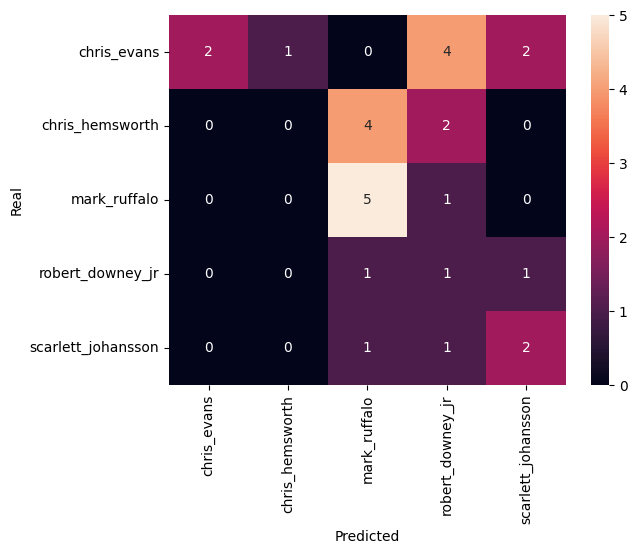

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_real, y_pred)
sns.heatmap(cm, annot = True, xticklabels= np.unique(names), yticklabels= np.unique(names))
plt.xlabel("Predicted")
plt.ylabel("Real")